In [2]:
import numpy as np
import cv2

In [3]:
dog_cascade = cv2.CascadeClassifier('haarcascade_dog_stage5.xml')

In [4]:
#imgin = cv2.imread('petfinderImages/37229968_3.jpg')
imgin = cv2.imread('/Users/matthewwalker/Pictures/Franklin/IMG_0064.JPG')
aspectRatio = float(imgin.shape[0])/float(imgin.shape[1])
targetHeight = 300.0
targetWidth = targetHeight / aspectRatio
print aspectRatio,targetWidth
img = cv2.resize(imgin, (int(targetWidth), int(targetHeight)), cv2.INTER_LINEAR)
print img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

1.33333333333 225.0
(300, 225, 3)


In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('ggplot')
%matplotlib inline

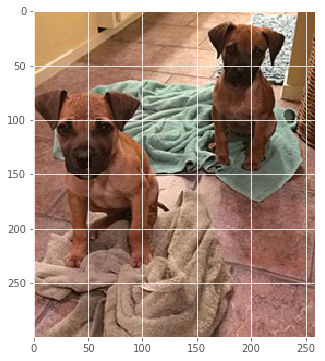

In [48]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#ax.imshow(gray)

4
89 127 51 51
5 183 30 30
74 4 33 33
140 12 35 35


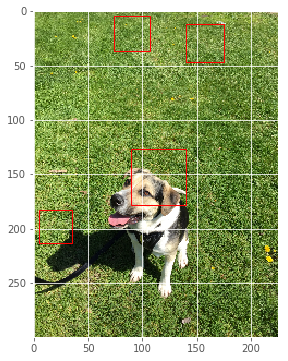

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
faces = dog_cascade.detectMultiScale(gray, 1.3, 5)
print len(faces)
for (x,y,w,h) in faces:
    print x,y,w,h
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

In [52]:
fig.show()

In [3]:
from keras.optimizers import SGD
from convnetskeras.convnets import preprocess_image_batch, convnet
from convnetskeras.imagenet_tool import synset_to_dfs_ids

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model = convnet('alexnet',weights_path="./alexnet_weights.h5", heatmap=True)
#model = convnet('vgg_16',weights_path="./vgg16_weights.h5", heatmap=True)
model.compile(optimizer=sgd, loss='mse')

# Then, we can get the image


Using Theano backend.
Using gpu device 0: GeForce GT 750M (CNMeM is disabled, cuDNN 5103)
/Library/Python/2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [4]:
#im = preprocess_image_batch(['/Users/matthewwalker/tmp/convnets-keras/examples/dog.jpg'], color_mode="bgr")
#im = preprocess_image_batch(['./Images/n02089867-Walker_hound/n02089867_822.jpg'], color_mode="bgr")
im = preprocess_image_batch(['/Users/matthewwalker/Pictures/Franklin/IMG_0064.JPG'], color_mode="bgr")
out = model.predict(im)

s = "n02084071"
ids = synset_to_dfs_ids(s)
heatmap = out[0,ids].sum(axis=0)


(70, 95)


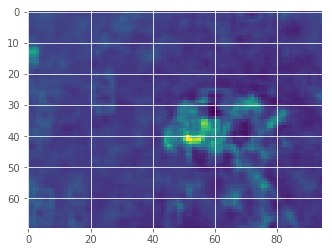

In [17]:
print heatmap.shape
fig, ax1 = plt.subplots()
ax1.imshow(heatmap)

In [21]:
ax1.imshow(im)

TypeError: Invalid dimensions for image data